## <span style="color:#1a73e8">Houskeeping: Load packages and datasets, clean dataframes, etc.</span>


In [55]:
library(lme4)
library(simr)
library(dplyr)
library(lmerTest)
library(ggplot2)
library(sjPlot)
library(interactions)
library(emmeans)
library(car)
library(patchwork)
library(psych)
library(corrplot)
library(forcats)
library(performance)


The downloaded binary packages are in
	/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T//Rtmp5jvhR3/downloaded_packages


In [56]:
# file_path <- "data/wm_task_questionnaires_merged.csv"
file_path <- "pilot_TOTAL_merged_questionnaires.csv"

In [57]:
# df <- read.csv(file_path)

In [58]:
df <- read.csv(file_path) %>%
  select(
    matches("^vviq[-.]\\d+$|^irq[-.]visual[-.]\\d+$|^irq[-.]verbal[-.]\\d+$"), 
    it_sim_dis_diff, it_sim_dis_diff_sq, reliability, v2_sim_dis_diff, v2_sim_dis_diff_sq,
    participant, validity, resp_correct, Accuracy, validity_binary, reliability_binary,
    v2_sim_dis_attend, v2_sim_dis_attend_z, v2_sim_dis_attend_sq_z, it_sim_dis_attend,
    it_sim_dis_attend_z, it_sim_dis_attend_sq_z, v2_sim_dis_unattend, v2_sim_dis_unattend_z,
    v2_sim_dis_unattend_sq_z, it_sim_dis_unattend, it_sim_dis_unattend_z,
    it_sim_dis_unattend_sq_z, it_sim_dis_diff_z, v2_sim_dis_diff_z, it_sim_dis_diff_sq_z,
    v2_sim_dis_diff_sq_z, v2_sim_dis_test_z, it_sim_dis_test_z, it_sim_dis_diff_test,
    it_sim_dis_diff_test_sq, v2_sim_dis_diff_test, v2_sim_dis_diff_test_z, it_sim_dis_diff_test_z,
    v2_sim_dis_diff_test_sq_z, it_sim_dis_diff_test_sq_z, it_sim_dis_test_sq_z, validity_binary_z,
    reliability_binary_z, v2_sim_dis_test_sq_z, rt, tested_memorability_resmem_z, v2_pos_neg_abs_z,
    it_pos_neg_abs_z, it_pos_neg_z, v2_pos_neg_z, it_sim_dis_diff_test_sign_z,
    it_sim_dis_diff_test_sign_sq_z, v2_sim_dis_diff_test_sign_z, v2_sim_dis_diff_test_sign_sq_z,
    it_sim_dis_test_sign_z, it_sim_dis_test_sign_sq_z, v2_sim_dis_test_sign_z,
    v2_sim_dis_test_sign_sq_z, it_int_abs, v2_int_abs, it_int_rel, v2_int_rel, it_int_rel_sq,
    v2_int_rel_sq, it_int_abs, v2_int_abs, it_int_abs_sq, v2_int_abs_sq, it_pos_neg_abs,
    v2_pos_neg_abs, it_pos_neg, v2_pos_neg, vviq_sum, vviq_z, osivq_verbal_mean,
    z_osivq_verbal_mean, osivq_visual_mean, z_osivq_visual_mean, osivq_spatial_mean,
    z_osivq_spatial_mean, irq_verbal_mean, z_irq_verbal_mean, irq_visual_mean,
    z_irq_visual_mean, pilot_number, osivq.catch.2, irq.catch.1,
  )

In [59]:
# # Identify subjects who fail the attention checks osivq.catch.2 and irq.catch.1
# failed_subjects <- df %>%
#   group_by(participant) %>%
#   summarize(
#     failed = any(osivq.catch.2 != 1 | irq.catch.1 != 1)
#   ) %>%
#   filter(failed == TRUE) %>%
#   pull(participant)

# # Remove all data from subjects who failed checks
# df_clean <- df %>%
#   filter(!(participant %in% failed_subjects))

# # Check how many subjects were removed
# cat("Removed", length(failed_subjects), "subjects who failed attention checks")

# df <- df_clean

In [60]:
# Create categorical questionnaire variables

df <- df %>%
  mutate(
    vviq_cat = case_when(
      vviq_sum <= quantile(vviq_sum, 1/3, na.rm = TRUE) ~ "low",
      vviq_sum <= quantile(vviq_sum, 2/3, na.rm = TRUE) ~ "medium",
      TRUE ~ "high"
    ),
    osivq_visual_cat = case_when(
      osivq_visual_mean <= quantile(osivq_visual_mean, 1/3, na.rm = TRUE) ~ "low",
      osivq_visual_mean <= quantile(osivq_visual_mean, 2/3, na.rm = TRUE) ~ "medium",
      TRUE ~ "high"
    ),
    osivq_verbal_cat = case_when(
      osivq_verbal_mean <= quantile(osivq_verbal_mean, 1/3, na.rm = TRUE) ~ "low",
      osivq_verbal_mean <= quantile(osivq_verbal_mean, 2/3, na.rm = TRUE) ~ "medium",
      TRUE ~ "high"
    ),
    osivq_spatial_cat = case_when(
      osivq_spatial_mean <= quantile(osivq_spatial_mean, 1/3, na.rm = TRUE) ~ "low",
      osivq_spatial_mean <= quantile(osivq_spatial_mean, 2/3, na.rm = TRUE) ~ "medium",
      TRUE ~ "high"
    ),
    irq_visual_cat = case_when(
      irq_visual_mean <= quantile(irq_visual_mean, 1/3, na.rm = TRUE) ~ "low",
      irq_visual_mean <= quantile(irq_visual_mean, 2/3, na.rm = TRUE) ~ "medium",
      TRUE ~ "high"
    ),
    irq_verbal_cat = case_when(
      irq_verbal_mean <= quantile(irq_verbal_mean, 1/3, na.rm = TRUE) ~ "low",
      irq_verbal_mean <= quantile(irq_verbal_mean, 2/3, na.rm = TRUE) ~ "medium",
      TRUE ~ "high"
    )
  )

In [61]:
# Set reference levels to low for each categorically coded imagery variable for regression models

df <- df %>%
  mutate(
    vviq_cat = fct_relevel(vviq_cat, "low"),
    osivq_visual_cat = fct_relevel(osivq_visual_cat, "low"),
    osivq_verbal_cat = fct_relevel(osivq_verbal_cat, "low"),
    osivq_spatial_cat = fct_relevel(osivq_spatial_cat, "low"),
    irq_visual_cat = fct_relevel(irq_visual_cat, "low"),
    irq_verbal_cat = fct_relevel(irq_verbal_cat, "low")
  )

In [62]:
# Reorder factor levels in dataframe

df <- df %>%
  mutate(
    vviq_cat = fct_relevel(vviq_cat, "low", "medium", "high"),
    irq_visual_cat = fct_relevel(irq_visual_cat, "low", "medium", "high"),
    irq_verbal_cat = fct_relevel(irq_verbal_cat, "low", "medium", "high")
  )

In [63]:
# Create df with only correct trials for RT
df_correct <- subset(df, resp_correct == 1)

## <span style="color:#1a73e8">Question 0: Do different imagery questionnaires relate?</span>

<span style="color:black; font-size:18px"><em>All the dimensions of IRQ and VVIQ are significantly positively correlated, with visual ones showing the strongest correlationship.</em></span>

In [64]:
# Step 1: Create subject-level dataset
df_subject_level <- df %>%
  group_by(participant) %>%
  summarize(
    vviq_z = first(vviq_z),
    z_irq_visual_mean = first(z_irq_visual_mean),
    z_irq_verbal_mean = first(z_irq_verbal_mean),
    .groups = "drop"
  ) %>%
  ungroup()

# Step 2: Select variables and rename
df_cor <- df_subject_level %>%
  select(-participant)

nice_names <- c("VVIQ", "IRQ Visual", "IRQ Verbal")
colnames(df_cor) <- nice_names

# Step 3: Run correlation test
cor_test_results <- psych::corr.test(df_cor, use = "pairwise", adjust = "none")

# Step 4: Format correlation table
r_mat <- round(cor_test_results$r, 2)
p_mat <- format.pval(cor_test_results$p, digits = 3, eps = .001)

cor_table <- matrix(
  paste0(r_mat, " (p=", p_mat, ")"),
  nrow = nrow(r_mat),
  ncol = ncol(r_mat),
  dimnames = dimnames(r_mat)
)

# Print formatted correlation table
cor_table

,VVIQ,IRQ Visual,IRQ Verbal
VVIQ,1 (p=<0.001),0.66 (p=<0.001),0.25 (p=<0.001)
IRQ Visual,0.66 (p=<0.001),1 (p=<0.001),0.47 (p=<0.001)
IRQ Verbal,0.25 (p=<0.001),0.47 (p=<0.001),1 (p=<0.001)


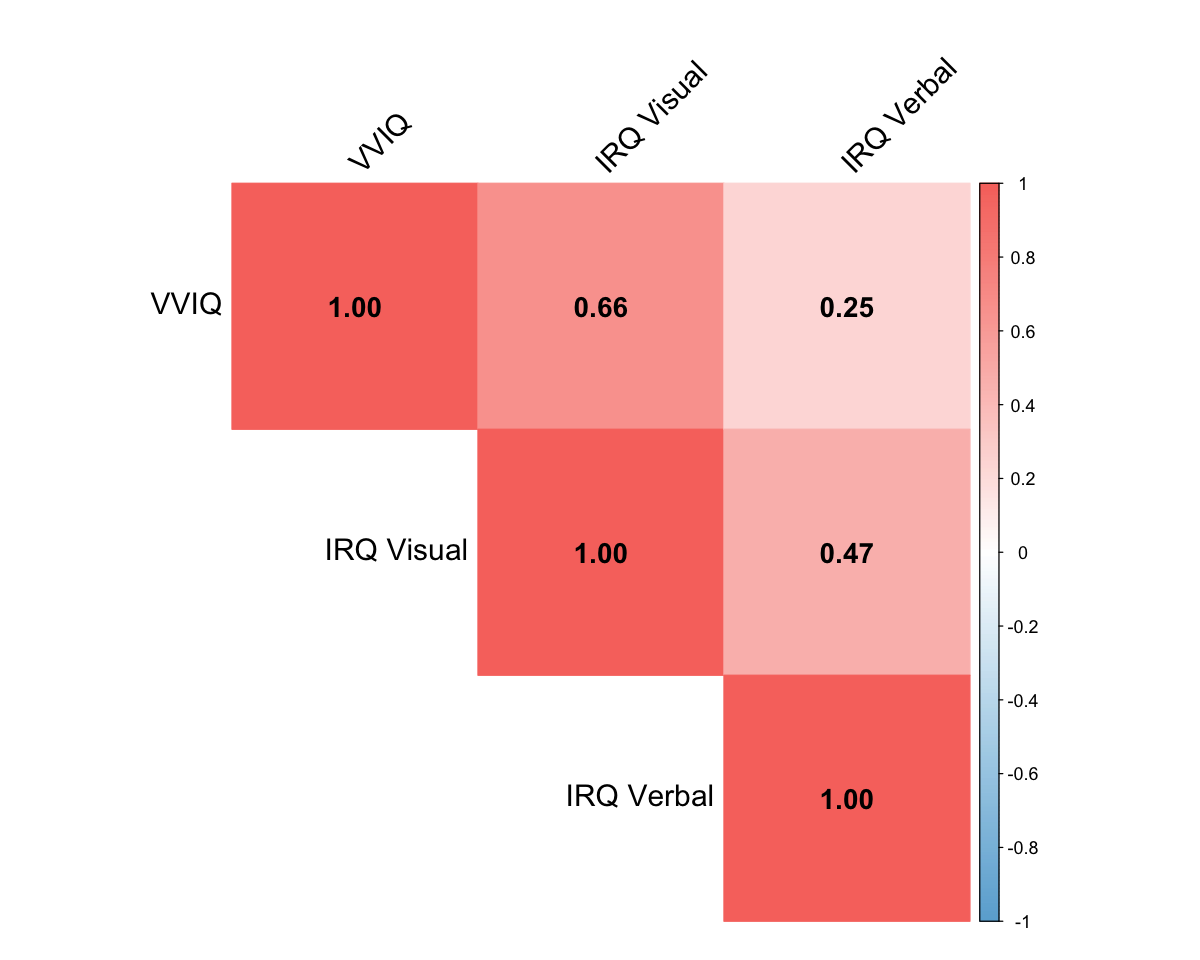

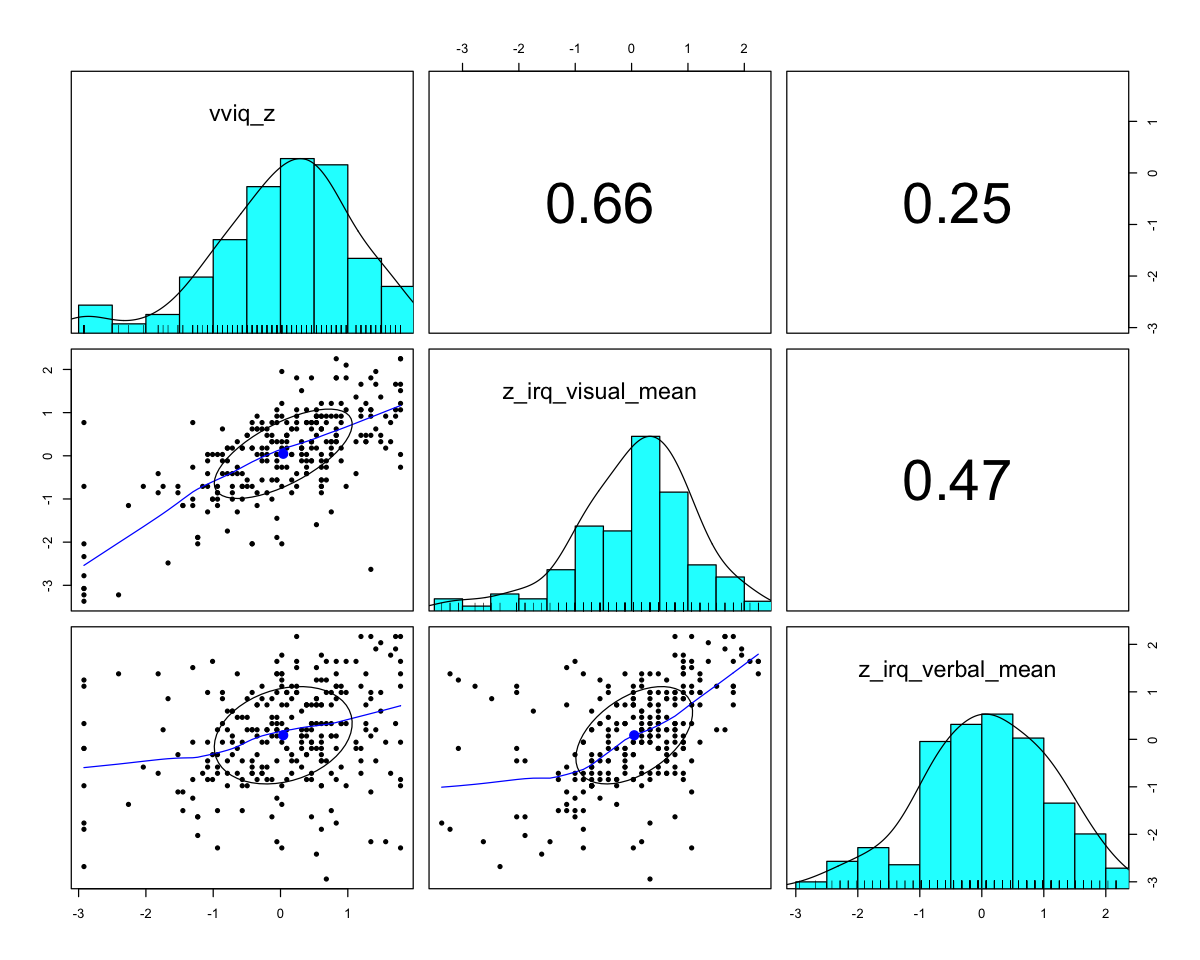

In [65]:
# Define color palette
my_col <- colorRampPalette(c("#6BAED6", "white", "#F8766D"))(200)

# ---- Plot 1: Correlation heatmap ----
corrplot(cor_test_results$r,
         method = "color",
         col = my_col,
         type = "upper",
         addCoef.col = "black",
         tl.col = "black",
         tl.cex = 1.5,
         number.cex = 1.4,
         cl.cex = 0.9,
         tl.srt = 45,
         p.mat = cor_test_results$p,
         sig.level = 0.05,
         insig = "blank")

# ---- Plot 2: Pairs panels ----

psych::pairs.panels(df_subject_level[, c("vviq_z", "z_irq_visual_mean", "z_irq_verbal_mean")])

## <span style="color:#1a73e8">Useful functions</span>

<!-- <span style="color:black; font-size:18px">blabla<em></em></span> -->

In [74]:
# A function for forest_plot to visualize effect sizes from regression models, with 95% ci

create_forest_plot <- function(model, title = "Coefficient Forest Plot", 
                               sig_level = 0.055, pos_color = "green4", 
                               neg_color = "red3", nonsig_color = "gray20",
                               plot_width = 4) {  # Added plot_width parameter
  library(ggplot2)
  library(dplyr)
  
  # Get model summary
  model_summary <- summary(model)
  
  # Check if the model is lmer or glmer and extract coefficients accordingly
  if ("coefficients" %in% names(model_summary)) {
    coefs <- model_summary$coefficients
  } else if ("coef" %in% names(model_summary)) {
    # Some models might use 'coef' instead of 'coefficients'
    coefs <- model_summary$coef
  } else {
    stop("Could not extract coefficients from the model summary")
  }
  
  coef_names <- rownames(coefs)
  
  # Get the correct column index for p-values
  # lmer models typically have p-values in different columns than glmer
  if (ncol(coefs) >= 5) { # lmer often includes "df" and p-values are column 5
    p_val_col <- 5
  } else { # glmer typically has p-values in column 4
    p_val_col <- 4
  }
  
  # Create a data frame with all the necessary information
  coef_data <- data.frame(
    term = coef_names,
    estimate = coefs[, 1],      # First column contains estimates
    std.error = coefs[, 2],     # Second column contains std errors
    p.value = coefs[, p_val_col] # p-values column
  )
  
  # If p-values are not available (sometimes happens with lmer), calculate them
  if (!("p.value" %in% colnames(coef_data)) || all(is.na(coef_data$p.value))) {
    coef_data$p.value <- 2 * (1 - pnorm(abs(coef_data$estimate / coef_data$std.error)))
  }
  
  # Calculate confidence intervals manually
  coef_data <- coef_data %>%
    mutate(
      conf.low = estimate - 1.96 * std.error,
      conf.high = estimate + 1.96 * std.error,
      # Color based on significance and direction
      color = case_when(
        p.value < sig_level & estimate > 0 ~ pos_color,
        p.value < sig_level & estimate < 0 ~ neg_color,
        TRUE ~ nonsig_color
      )
    ) %>%
    # Filter out the intercept (typically named "(Intercept)" or "Intercept")
    filter(!grepl("^\\(?[Ii]ntercept\\)?$", term))
  
  # Create the forest plot with adjustments
    p <- ggplot(coef_data, aes(x = estimate, y = reorder(term, estimate))) +
      geom_vline(xintercept = 0, linetype = "dashed", color = "gray50") +
      geom_errorbarh(aes(xmin = conf.low, xmax = conf.high, color = color), 
                     height = 0, linewidth = 0.5) +
      geom_point(aes(color = color), size = 4) +
      scale_color_identity() +
      labs(
        title = title,
        x = "Estimate",
        y = "Fixed Effects"  # ← changed here
      ) +
      theme_clean_nogrid +
      theme(
        axis.text.y = element_text(size = 16, angle = 15, hjust = 1),  # ← tilt y labels
        axis.text.x = element_text(size = 14),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5, margin = margin(b = 15)),
        plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
      ) +
      coord_cartesian(clip = "off", expand = TRUE)  # ← prevent clipping
  
  # Return the plot with explicit dimensions
  return(p)
}

In [75]:
# A function for model_plot(type=pred) for various models I'll be running: (plot_model_predictions)

# Increase default line width globally
update_geom_defaults("line", list(linewidth = 3))

# Cstom clean theme
theme_clean_nogrid <- theme(
  panel.background = element_blank(),
  plot.background = element_blank(),
  panel.grid = element_blank(),
  axis.line = element_line(color = "black"),
  axis.text = element_text(size = 20),
  axis.title = element_text(size = 20, face = "bold"),
  plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
  strip.text = element_text(size = 20, face = "bold"),
  legend.title = element_text(size = 16),
  legend.text = element_text(size = 16)
)

# Set1-like colors
set1_colors <- c("#E41A1C", "#377EB8", "#4DAF4A")

# function
plot_model_predictions <- function(model, term_list, titles,
                                   y_label = "Predicted Value", 
                                   ylims = NULL,
                                   legend_labels = c("Low", "Medium", "High"),
                                   legend_title = "Imagery Strength",
                                   caption = "",
                                   shared_x_title = TRUE,
                                   custom_colors = NULL,
                                   x_titles = NULL,
                                   width = 14, height = 8,
                                   preview_width = NULL, preview_height = NULL,
                                   save_path = NULL,
                                   transform = NULL,
                                   ci.lvl = 0.68
                                  ) {
  # If custom_colors is NULL, use the default set1_colors
  colors_to_use <- if(is.null(custom_colors)) {
    set1_colors  # Your default colors defined elsewhere
  } else {
    custom_colors
  }
  
  # If only one color is provided, replicate it
  if(length(colors_to_use) == 1) {
    colors_to_use <- rep(colors_to_use, 3)  # Create 3 copies of the same color
  }

  if (!is.null(preview_width) && !is.null(preview_height)) {
    options(repr.plot.width = preview_width,
            repr.plot.height = preview_height)
  }

  # Determine x-axis titles
  x_axis_titles <- if (shared_x_title) {
    rep("", length(term_list))
  } else if (!is.null(x_titles)) {
    x_titles
  } else {
    sapply(term_list, function(term) term[1])
  }

  # Generate plots
  plots <- Map(function(term, title, x_title, show_legend) {
    plot_model(
      model,
      type = "pred",
      terms = term,
      ci.lvl = 0.68,
      transform = transform,  # for glmer: "plogis"
      title = title,
      axis.title = c(x_title, ifelse(title == titles[[1]], y_label, ""))
    ) +
      scale_color_manual(values = colors_to_use, labels = legend_labels, name = legend_title) +
      scale_fill_manual(values = colors_to_use, labels = legend_labels, name = legend_title) +
      guides(color = guide_legend(direction = "horizontal")) +
      theme_clean_nogrid +
      (if (!is.null(ylims)) ylim(ylims[1], ylims[2]) else NULL) +
      (if (!show_legend) theme(legend.position = "none") else NULL)
  },
  term = term_list,
  title = titles,
  x_title = x_axis_titles,
  show_legend = c(TRUE, rep(FALSE, length(term_list) - 1)))

  # Combine plots
  combined <- wrap_plots(plots) +
    plot_layout(guides = "collect") +
    plot_annotation(
      theme = theme(legend.position = "bottom"),
      caption = caption
    ) &
    theme(plot.caption = element_text(size = 22, face = "bold", hjust = 0.5, margin = margin(t = 22)))

  # Save if needed
  if (!is.null(save_path)) {
    ggsave(save_path, combined, width = width, height = height, dpi = 300)
  }

  return(combined)
}

# # USE CASE
# # Shared labels
# plot_model_predictions(
#   model = my_model,
#   term_list = list(c("x", "z1"), c("x", "z2")),
#   titles = c("Z1 Effect", "Z2 Effect"),
#   y_label = "Predicted RT",
#   caption = "Shared x-axis: x",
#   shared_x_title = TRUE
# )

# # Custom x-axis labels per plot
# plot_model_predictions(
#   model = my_model,
#   term_list = list(c("x1", "z1"), c("x2", "z2")),
#   titles = c("X1 × Z1", "X2 × Z2"),
#   x_titles = c("X1 Similarity", "X2 Similarity"),
#   y_label = "Predicted RT",
#   caption = "Different predictors with custom X labels",
#   shared_x_title = FALSE
# )
       
# # GLMER USE CASE
# plot_model_predictions(
#   model = my_glmer_model,
#   term_list = list(c("x", "z1"), c("x", "z2")),
#   titles = c("Z1", "Z2"),
#   y_label = "Predicted Accuracy",
#   caption = "Predicted Probabilities from GLMM",
#   transform = "plogis",  # <- This is important
#   preview_width = 12, preview_height = 8
# )



In [76]:
# A function to create model summary tables

model_summary_table <- function(model,
                                caption = "Model Summary",
                                p_cutoff = 0.055,
                                rename_terms = NULL,
                                font_size = 16,
                                caption_size = 20) {
  require(parameters)
  require(dplyr)
  require(kableExtra)
  require(knitr)
  require(IRdisplay)
  require(plyr)

  # Check if binomial model
  is_logistic <- inherits(model, "glmerMod") &&
                 grepl("binomial", family(model)$family, ignore.case = TRUE)

  # Get parameters (exponentiated for logit)
  param_table <- model_parameters(
    model,
    effects = "fixed",
    ci = NULL,
    digits = 3,
    exponentiate = is_logistic
  )

  # Rename for logistic models
  if (is_logistic) {
    names(param_table)[names(param_table) == "Coefficient"] <- "Odds Ratio"
  }

  # Optional renaming of predictors
  if (!is.null(rename_terms) && is.character(rename_terms) && !is.null(names(rename_terms))) {
    param_table$Parameter <- plyr::revalue(param_table$Parameter, rename_terms)
  }

  # Add significance stars
  param_table <- param_table %>%
    mutate(Signif = case_when(
      p < 0.001 ~ "***",
      p < 0.01  ~ "**",
      p < p_cutoff ~ "*",
      p < 0.1   ~ ".",
      TRUE      ~ ""
    ))

  # Bold significant parameter names
  param_table <- param_table %>%
    mutate(Parameter = ifelse(p < p_cutoff,
                              cell_spec(Parameter, bold = TRUE),
                              as.character(Parameter)))

  # Determine columns to show (check existence)
  coef_col <- if ("Odds Ratio" %in% names(param_table)) "Odds Ratio" else "Coefficient"
  stat_col <- if ("t" %in% names(param_table)) "t" else if ("z" %in% names(param_table)) "z" else NULL

  # Final columns to display
  display_cols <- c("Parameter", coef_col, "SE", stat_col, "p", "Signif")
  display_cols <- display_cols[display_cols %in% names(param_table)]

  # Format and display table
  html_table <- param_table %>%
    select(all_of(display_cols)) %>%
    kbl(escape = FALSE, format = "html", caption = caption) %>%
    kable_styling(
      full_width = FALSE,
      position = "center",
      bootstrap_options = c("striped", "hover", "condensed", "responsive"),
      font_size = font_size
    ) %>%
    as.character()

  styled_html <- paste0(
    "<style>caption { font-size:", caption_size, "px; font-weight: bold; text-align: center; }</style>",
    html_table
  )

  IRdisplay::display_html(styled_html)
}


# # Use case
# term_names <- c(
#   "v2_sim_dis_test_z" = "V2 Similarity",
#   "vviq_z" = "VVIQ",
#   "z_irq_visual_mean" = "IRQ Visual",
#   "z_irq_verbal_mean" = "IRQ Verbal",
#   "it_sim_dis_test_z" = "Item Similarity"
# )

# pretty_model_table(
#   model = distractor_tested_similarity_rt_cont_model,
#   caption = "Model Summary: V2 & Item Similarity Effects",
#   p_cutoff = 0.055,
#   rename_terms = term_names,
#   font_size = 16,
#   caption_size = 20
# )

## <span style="color:#1a73e8">Question 1: Do imagery differences predict performance in a WM task?</span>

<span style="color:black; font-size:18px"><em>No! Neither RT nor accuracy are affected by VVIQ or IRQ</em></span>


### <span style="color:black"><em>Question 1: Models</em></span>

In [78]:
overall_imagery_rt_cont <- lmer(rt ~ vviq_z + z_irq_visual_mean + z_irq_verbal_mean + 
                                     (1 | participant) + (1 | pilot_number), 
                                data = df_correct, control = lmerControl(optimizer = "bobyqa"))


summary(overall_imagery_rt_cont)

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
rt ~ vviq_z + z_irq_visual_mean + z_irq_verbal_mean + (1 | participant) +  
    (1 | pilot_number)
   Data: df_correct
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 78773.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2985 -0.7375 -0.1707  0.5741  3.7907 

Random effects:
 Groups       Name        Variance Std.Dev.
 participant  (Intercept) 0.03574  0.1890  
 pilot_number (Intercept) 0.00000  0.0000  
 Residual                 0.22076  0.4699  
Number of obs: 58624, groups:  participant, 262; pilot_number, 2

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)         1.56241    0.01189 258.25410 131.412   <2e-16 ***
vviq_z              0.01285    0.01553 258.97770   0.827    0.409    
z_irq_visual_mean  -0.01126    0.01689 258.89868  -0.666    0.506    
z_irq_verbal_mean   0.01377    0.01319 257.814

In [70]:
overall_imagery_rt_cat <- lmer(rt ~ vviq_cat + irq_visual_cat + irq_verbal_cat + 
                                    (1 | participant) + (1 | pilot_number), 
                                data = df_correct, control = lmerControl(optimizer = "bobyqa"))


# summary(overall_imagery_rt_cat)

boundary (singular) fit: see help('isSingular')



In [71]:
overall_imagery_acc_cont <- glmer(resp_correct ~ vviq_z + z_irq_visual_mean + z_irq_verbal_mean + 
                                (1 | participant) + (1 | pilot_number), 
                                data = df, family = binomial, control = glmerControl(optimizer = "bobyqa"))


# summary(overall_imagery_acc_cont)

boundary (singular) fit: see help('isSingular')



In [72]:
overall_imagery_acc_cat <- glmer(resp_correct ~ vviq_cat + irq_visual_cat + irq_verbal_cat + 
                                (1 | participant) + (1 | pilot_number), 
                                data = df, family = binomial, control = glmerControl(optimizer = "bobyqa"))


# summary(overall_imagery_acc_cat)

### <span style="color:black"><em>Question 1: Tables</em></span>

In [73]:
model_summary_table(
  model = overall_imagery_rt_cont,
  caption = "",
  p_cutoff = 0.055,
  font_size = 16,
  caption_size = 20
)


Loading required package: parameters

Loading required package: kableExtra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘kableExtra’”
Loading required package: knitr

Loading required package: IRdisplay


Attaching package: ‘IRdisplay’


The following object is masked from ‘package:parameters’:

    display


The following object is masked from ‘package:performance’:

    display


Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,


ERROR: Error in cell_spec(Parameter, bold = TRUE): could not find function "cell_spec"


In [79]:
model_summary_table(
  model = overall_imagery_rt_cat,
  caption = "",
  p_cutoff = 0.055,
  font_size = 16,
  caption_size = 20
)

Loading required package: kableExtra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘kableExtra’”


ERROR: Error in cell_spec(Parameter, bold = TRUE): could not find function "cell_spec"


In [ ]:
model_summary_table(
  model = overall_imagery_acc_cont,
  caption = "",
  p_cutoff = 0.055,
  font_size = 16,
  caption_size = 20
)

In [ ]:
model_summary_table(
  model = overall_imagery_acc_cat,
  caption = "",
  p_cutoff = 0.055,
  font_size = 16,
  caption_size = 20
)

## <span style="color:#1a73e8">Question 2: Do individual differences in imagery predict differential recruitment of low-level visual and high-level object-level representations during WM?</span>

<span style="color:black; font-size:18px"><em>Seems like it!</em></span>

### <span style="color:#black"><em>Question 2: Models</em></span>

**Model 1: distractor_tested_similarity_rt_cont_model**

In [ ]:
distractor_tested_similarity_rt_cont_model <- lmer(rt ~ v2_sim_dis_test_z * vviq_z +
                                                        v2_sim_dis_test_z * z_irq_visual_mean +
                                                        v2_sim_dis_test_z * z_irq_verbal_mean +
                                                        it_sim_dis_test_z * vviq_z +
                                                        it_sim_dis_test_z * z_irq_visual_mean +
                                                        it_sim_dis_test_z * z_irq_verbal_mean +
                                                        (1 | participant) + (1 | pilot_number),
                                                   data = df_correct, control = lmerControl(optimizer = "bobyqa"))


# summary(distractor_tested_similarity_rt_cont_model)

**Model 2: distractor_tested_similarity_rt_cat_model**

In [ ]:
distractor_tested_similarity_rt_cat_model <- lmer(rt ~ v2_sim_dis_test_z * vviq_cat +
                                                        v2_sim_dis_test_z * irq_visual_cat +
                                                        v2_sim_dis_test_z * irq_verbal_cat +
                                                        it_sim_dis_test_z * vviq_cat +
                                                        it_sim_dis_test_z * irq_visual_cat +
                                                        it_sim_dis_test_z * irq_verbal_cat +
                                                        (1 | participant) + (1 | pilot_number),
                                                  data = df_correct, control = lmerControl(optimizer = "bobyqa"))


# summary(distractor_tested_similarity_rt_cat_model)

**Model 3: distractor_tested_similarity_acc_cont_model**

In [ ]:
distractor_tested_similarity_acc_cont_model <- glmer(resp_correct ~ v2_sim_dis_test_z * vviq_z +
                                                                    v2_sim_dis_test_z * z_irq_visual_mean +
                                                                    v2_sim_dis_test_z * z_irq_verbal_mean +
                                                                    it_sim_dis_test_z * vviq_z +
                                                                    it_sim_dis_test_z * z_irq_visual_mean +
                                                                    it_sim_dis_test_z * z_irq_verbal_mean +
                                                                    (1 | participant) + (1 | pilot_number),
                                                     data = df, family = binomial,
                                                     control = glmerControl(optimizer = "bobyqa"))




**Model 4: distractor_tested_similarity_acc_cat_model**

In [ ]:
distractor_tested_similarity_acc_cat_model <- glmer(resp_correct ~ v2_sim_dis_test_z * vviq_cat +
                                                                    v2_sim_dis_test_z * irq_visual_cat +
                                                                    v2_sim_dis_test_z * irq_verbal_cat +
                                                                    it_sim_dis_test_z * vviq_cat +
                                                                    it_sim_dis_test_z * irq_visual_cat +
                                                                    it_sim_dis_test_z * irq_verbal_cat +
                                                                    (1 | participant) + (1 | pilot_number),
                                                     data = df, family = binomial,
                                                     control = glmerControl(optimizer = "bobyqa"))

### <span style="color:black"><em>Question 2: Plots and Tables</em></span>

**Model 1: distractor_tested_similarity_rt_cont_model**

In [ ]:
model_summary_table(
  model = distractor_tested_similarity_rt_cont_model,
  caption = "",
  p_cutoff = 0.055,
#   rename_terms = terms,
  font_size = 16,
  caption_size = 20
)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
create_forest_plot(distractor_tested_similarity_rt_cont_model, "")

In [ ]:
# Plot significant effects 

# Define terms and titles
terms <- list(
  c("v2_sim_dis_test_z", "z_irq_visual_mean"),
  c("v2_sim_dis_test_z", "z_irq_verbal_mean")
)

titles <- c("IRQ Visual", "IRQ Verbal")

# Plot
plot_model_predictions(
    model = distractor_tested_similarity_rt_cont_model,
    term_list = terms,
    titles = titles,
    y_label = "Predicted RT",
    ylims = c(1.4, 1.7),
    width = 12, height = 8,                # saved plot
    preview_width = 12, preview_height = 8,  # notebook display
    caption = "V2 Similarity Between Distractor and Tested Item",
    shared_x_title = TRUE,
    #save_path = "combined_irq_plots.png"
)

**Model 2: distractor_tested_similarity_rt_cat_model**

In [ ]:
model_summary_table(
  model = distractor_tested_similarity_rt_cat_model,
  caption = "",
  p_cutoff = 0.055,
  font_size = 16,
  caption_size = 20
)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
create_forest_plot(distractor_tested_similarity_rt_cat_model, "")

In [ ]:
# Plot significant effects 

# Define terms and titles
terms <- list(
  c("it_sim_dis_test_z", "vviq_cat"),
  c("it_sim_dis_test_z", "irq_visual_cat"),
  c("v2_sim_dis_test_z", "irq_verbal_cat")
)

titles <- c("VVIQ", "IRQ Visual", "IRQ Verbal")
x_titles <- c("IT Similarity", "IT Similarity", "V2 Similarity")

# Plot
plot_model_predictions(
    model = distractor_tested_similarity_rt_cat_model,
    term_list = terms,
    titles = titles,
    x_titles = x_titles,
    y_label = "Predicted RT",
    ylims = c(1.4, 1.7),
    width = 12, height = 6,                # saved plot
    preview_width = 12, preview_height = 6,  # notebook display
    caption = "",
    shared_x_title = FALSE,
    #save_path = "combined_irq_plots.png"
)

**Model 3: distractor_tested_similarity_acc_cont_model**

In [ ]:
model_summary_table(
  model = distractor_tested_similarity_acc_cont_model,
  caption = "",
  p_cutoff = 0.055,
  font_size = 16,
  caption_size = 20
)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
create_forest_plot(distractor_tested_similarity_acc_cont_model, "")

In [ ]:
# Plot significant effects 

# Define terms and titles
terms <- list(
  c("v2_sim_dis_test_z", "vviq_z")
)

# titles <- c("VVIQ", "IRQ Visual", "IRQ Verbal")
x_titles <- "V2 Similarity"

# Plot
plot_model_predictions(
    model = distractor_tested_similarity_acc_cont_model,
    term_list = terms,
    titles = c("VVIQ"),
    x_titles = x_titles,
    y_label = "Predicted Accuracy",
#     ylims = c(1.4, 1.7),
    width = 7, height = 7,                # saved plot
    preview_width = 6, preview_height = 7,  # notebook display
    caption = "",
    shared_x_title = FALSE,
    #save_path = "combined_irq_plots.png"
)

In [ ]:
# Plot significant effects 

# Define terms and titles
terms <- list(
#   c("v2_sim_dis_test_z", "irq_visual_cat"),
  "it_sim_dis_test_z"
)

titles <- c("")
x_titles <- "IT Similarity"

# Plot
plot_acc_it <- plot_model_predictions(
  model = distractor_tested_similarity_acc_cont_model,
  term_list = list("it_sim_dis_test_z"),
  titles = c(""),  # No title
  x_titles = "IT Similarity",
  y_label = "Predicted Accuracy",
  transform = "plogis",
  ci.lvl = 0.68,
  width = 8, height = 8,
  preview_width = 8, preview_height = 8,
  caption = "",
  shared_x_title = FALSE
)

In [ ]:
# Plot significant effects 

# Define terms and titles
terms <- list(
#   c("v2_sim_dis_test_z", "irq_visual_cat"),
  "v2_sim_dis_test_z"
)

titles <- c("")
x_titles <- "V2 Similarity"

# Plot
plot_acc_v2 <- plot_model_predictions(
  model = distractor_tested_similarity_acc_cont_model,
  term_list = list("v2_sim_dis_test_z"),
  titles = c(""),  # No title
  x_titles = "V2 Similarity",
  y_label = "Predicted Accuracy",
  transform = "plogis",
  ci.lvl = 0.68,
  width = 8, height = 8,
  preview_width = 8, preview_height = 8,
  caption = "",
  custom_colors = c("blue", 3),
  shared_x_title = FALSE
)

In [ ]:
# This is from the same model but for RT, I just want to put accuracy and RT side by side

# Define terms and titles
terms <- list(
  "it_sim_dis_test_z"
)

titles <- c("")
x_titles <- "IT Similarity"

# Plot
plot_rt <- plot_model_predictions(
  model = distractor_tested_similarity_rt_cont_model,
  term_list = list("it_sim_dis_test_z"),
  titles = c(""),  # No title
  x_titles = "IT Similarity",
  y_label = "Predicted RT",
  ylims = c(1.4, 1.7),
  width = 8, height = 8,
  preview_width = 8, preview_height = 8,
  caption = "",
  shared_x_title = FALSE,
  legend_labels = NULL,  # <- No legend needed
)

# plot_rt

In [ ]:
# Combine with patchwork
combined_plot <- plot_rt + plot_acc_it + plot_acc_v2 + 
  plot_layout(guides = "collect") &
  theme(legend.position = "bottom")


options(repr.plot.width = 12, repr.plot.height = 6)

# View combined plot
combined_plot

In [ ]:
model_summary_table(
  model = distractor_tested_similarity_acc_cat_model,
  caption = "",
  p_cutoff = 0.055,
  font_size = 16,
  caption_size = 20
)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
create_forest_plot(distractor_tested_similarity_acc_cat_model, "")

In [ ]:
terms <- list(
  c("v2_sim_dis_test_z", "vviq_cat"),
  c("v2_sim_dis_test_z", "irq_verbal_cat")
)

titles <- c("VVIQ", "IRQ Verbal")
# x_titles <- c("V2 Similarity", "V2 Similarity")

# Update y-axis label and limits for accuracy
plot_model_predictions(
    model = distractor_tested_similarity_acc_cat_model,
    term_list = terms,
    titles = titles,
    x_titles = "V2 Similarity",
    y_label = "Predicted Accuracy",
    ylims = c(0.6, 0.9),
#     width = 6, height = 8,
    preview_width = 10, preview_height = 6,
    caption = "",
    shared_x_title = FALSE
    #save_path = "combined_irq_accuracy_plots.png"
)

### <span style="color:black"><em>Question 2: Check for multicoliniarity each model using Variance Inflation Factor (VIF)</em></span>

<span style="color:black; font-size:18px"><em>VIFs under 3 are normal, under 5 are borderline</em></span>

<span style="color:black; font-size:18px">VIFs are under 3 for our models with continuous imagery scores, but for the ones with categorical imagery, VIFs for some interactions are ~5. Might want to stick to the simple one?</em></span>

In [ ]:
# # VIF stands for Variance Inflation Factor.
# # It’s a diagnostic tool that helps detect multicollinearity in regression models — i.e.,
# # when predictor variables are too highly correlated with each other.

check_collinearity(distractor_tested_similarity_rt_cont_model)
check_collinearity(distractor_tested_similarity_rt_cat_model)
check_collinearity(distractor_tested_similarity_acc_cont_model)
check_collinearity(distractor_tested_similarity_acc_cat_model)

### <span style="color:black"><em>Question 2: Writeup</em></span>

<span style="color:black; font-size:18px">Here, we look at how different types of similarities—V2 and IT—between distractor and tested item influence WM performance.</span>

<span style="color:black; font-size:25px">**Results:**</span>
<br><br>

<div style="font-size: 1.3em">

- **No main effect of imagery scores**
<br>
- **Main effect of IT similarity on RT and accuracy: More "semantically" similar distractor and tested item are, better people's WM performance is. Here are the models this was true for all the models I've run:**
  - RT model with continuous imagery predictors
  - RT model with categorical imagery predictors
  - Accuracy model with continuous imagery predictors
  - Accuracy model with categorical imagery predictors
<br>
- **Marginal main effect of V2 similarity on accuracy: In the categorical model, increased VVIQ scores predicted lower accuracy. This effect is marginal (p=.07), but suggests interesting potential differential contributions of semantic and visual similarity during WM: While semantic interference facilitates WM performance, visual might be interfering.**
<br><br>
- **Interaction between visual imagery and different similarity types**
  - As V2 similarity increases, participant with stronger visual imagery get worse as reflected by longer RTs and decreased accuracies. We found this effect both for VVIQ and IRQ Visual measures in the following models:
    - RT models with continuous IRQ Visual predictor; This interaction was marginally significant in the model with categorical IRQ Visual as a predictor (p = .09)
    - Accuracy model with categorical VVIQ predicted significantly lower accuracy in strong VVIQ-ers compared to weak VVIQ-ers as V2 similarity increased. The model with continuous VVIQ was marginally significant in the same direction, p = .07 
    - For participants with low imagery, there seem to be an opposite trend: Their RTs decrease as V2 similarity increases
  - Visual imagert also interacts with IT similarity. As mentioned above, IT similarity overall facilitates performance on this task. However, it seems to have the greatest facilitation effect on medium VVIQ-ers—potentially due to them being able to recruit different representational formats flexibly? However, for IRQ Visual, semantic facilitation (IT similarity) effect seemed to benefit low visual imagers the most.
    - We found this effect in RT model with categorical imagery predictors. Nowhere else.
<br><br>
- **Interaction between verbal imagery and different similarity types**
    - As V2 similarity increases, participant with stronger verbal imagery get better as reflected by longer RTs, and higher accuracy. The pattern seems to be opposite for the low verbal imagers. This result is a mirroring result for the visual imagery-v2 similarity finding reported above. We found this effect in:
        - RT model with continuous imagery predictors
        - Accuracy model with categorical imagery predictors: Both high and medium verbal imagers benefited from V2 similarity. However, medium verbal imagers benefited significantly greately than low verbal imagers


</div>

<span style="color:black; font-size:25px">**Takeaways / speculative interpretations:**</span>
<br><br>

<div style="font-size: 1.3em">
    
- **Semantic similarity (IT) helps WM**

  - Participants perform better (faster RTs and higher accuracy) when the distractor is semantically similar to the tested item  
  - Suggests overall reliance on semantic representations in working memory?  
  - Robust across models—except for the categorical imagery × accuracy model
    
- **Visual imagery modulates sensitivity to visual similarity (V2)**

  - High visual imagers show worse performance (longer RTs) as V2 similarity increases—possibly due to greater interference from visually similar distractors: They might rely more heavily on depictive representations that are vulnerable to overlap 
  - Low visual imagers show the opposite trend—faster RTs with higher V2 similarity—possibly because they rely less on fine-grained visual features, but are still encoding some visual properties and similar distractor might be aiding them in this case
  - Effect appears specific to the IRQ Visual questionnaire, not VVIQ. VVIQ assesses **vividness** of visual imagery, while IRQ assesses **propensity**. Might have to do something with the types of imagery they are assessing, or be due to some more boring differences between the two instruments.
    
- **VVIQ modulates effect of IT similarity in RT**

  - Medium visual imagers (VVIQ) benefit the most from IT similarity—possibly due to flexible encoding strategies (e.g., switching between visual and semantic formats)  
  - Suggests that moderate imagery ability may be a sweet spot for maximizing benefits of semantic facilitation

- **Verbal imagery modulates response to visual similarity (V2)**

  - High verbal imagers perform better (faster RTs and higher accuracy) as V2 similarity increases—possibly leveraging verbal labeling or recoding to reduce visual interference, or just relying less on fine-grained visual representations  
  - Low verbal imagers show an opposite trend: Potentially due to decrease in access to verbal encoding and relying more on visual representations in which case if distractors are highly visually similar, the interference arises
    
- **General thoughts**

  - Interactions > main effects: Individual differences matter most in strategies people utilize during WM, not the overall quality of their performance
  - High visual imagers might use sensory recruitment (e.g., early visual cortex) more than low, making them prone to interference when distractors share low-level features with targets
  - Medium imagers may flexibly switch formats—explaining them maximizing the benefit of IT similarity (IT similarity in general seems to have a facilitating effect, and would make sense to utilize it as much as possible if you have flexibility).
    
</div>


## <span style="color:#1a73e8">Exploration 1: PCA of VVIQ and IRQ visual revealed 2 PCs</span>

<span style="color:black; font-size:18px">PCA analysis revealed 2 PCs: One to which both IRQ and VVIQ items loaded significantly—general visual imagery scale—and PC2 where IRQ and VVIQ have opposite loading patterns. <br><br>I quickly ran the model with v2/it similarities and PC1 and PC2 instead of vviq and irq scores, but did not find any effects for PCs.<br><br>I am just leaving this part as it is for now. It is not crucial for this project.</span>


In [ ]:
# Step 1: Select only VVIQ and IRQ Visual items (adjust column names if needed)
item_data <- df %>%
  select(matches("^vviq[-.]\\d+$|^irq[-.]visual[-.]\\d+$")) %>%
  select(where(is.numeric)) %>%  # Ensure all selected columns are numeric
  na.omit()

In [ ]:
pca_items <- prcomp(item_data, scale. = TRUE)

# Scree plot and variance explained
# summary(pca_items)

# Top 2–3 PCs
round(pca_items$rotation[, 1:3], 2)

In [ ]:
loadings_df <- as.data.frame(pca_items$rotation[, 1:3])
loadings_df$Item <- rownames(loadings_df)

top_pc2_items <- loadings_df %>%
  select(Item, PC2) %>%
  arrange(desc(abs(PC2)))  # Items most contributing to PC2

head(top_pc2_items, 26)

In [ ]:
library(ggplot2)

loadings_df <- as.data.frame(pca_items$rotation[, 1:2])
loadings_df$Item <- rownames(loadings_df)
loadings_df$Scale <- ifelse(grepl("^vviq", loadings_df$Item), "VVIQ", "IRQ Visual")

ggplot(loadings_df, aes(x = PC1, y = PC2, label = Item, color = Scale)) +
  geom_point(size = 3) +
  geom_text(nudge_y = 0.02, size = 3) +
  scale_color_manual(values = c("VVIQ" = "#E41A1C", "IRQ Visual" = "#377EB8")) +
  theme_minimal() +
  labs(title = "Item Loadings on PC1 vs PC2", x = "PC1 (General Imagery)", y = "PC2 (Scale Contrast)")


In [ ]:
# Step 1: Select items for PCA
item_data <- df_correct %>%
  select(matches("^vviq[-.]\\d+$|^irq[-.]visual[-.]\\d+$")) %>%
  select(where(is.numeric)) %>%
  na.omit()

# Step 2: Run PCA
pca_items <- prcomp(item_data, scale. = TRUE)

# Step 3: Add PC1 and PC2 scores to df_correct (must match rows after na.omit)
df_correct_pca <- df_correct[rownames(item_data), ]  # Match rows after NA removal
df_correct_pca$pca_visual_pc1 <- pca_items$x[, 1]
df_correct_pca$pca_visual_pc2 <- pca_items$x[, 2]

In [ ]:
# Revised model with PC1 and PC2 (continuous visual imagery scores)
distractor_tested_similarity_rt_pca_model <- lmer(
  rt ~ v2_sim_dis_test_z * pca_visual_pc1 +
       v2_sim_dis_test_z * pca_visual_pc2 +
       v2_sim_dis_test_z * z_irq_verbal_mean +
       it_sim_dis_test_z * pca_visual_pc1 +
       it_sim_dis_test_z * pca_visual_pc2 +
       it_sim_dis_test_z * z_irq_verbal_mean +
       (1 | participant) + (1 | pilot_number),
  data = df_correct_pca,
  control = lmerControl(optimizer = "bobyqa")
)

# View model summary
summary(distractor_tested_similarity_rt_pca_model)

In [ ]:
# Item-level contribution V2 Similarity

library(lme4)
library(broom.mixed)
library(purrr)
library(dplyr)
library(stringr) 

item_names <- grep("^vviq[-.]\\d+$|^irq[-.]visual[-.]\\d+$", names(df_correct), value = TRUE)

item_effects <- map_dfr(item_names, function(item) {
  formula <- as.formula(paste0("rt ~ v2_sim_dis_test_z * ", item, " + (1 | participant) + (1 | pilot_number)"))
  
  model <- suppressMessages(
    suppressWarnings(
      lmer(formula, data = df_correct, control = lmerControl(optimizer = "bobyqa"))
    )
  )
  
  tidy(model) %>%
    filter(str_detect(term, paste0("v2_sim_dis_test_z:", item))) %>%
    mutate(Item = item)
})

In [ ]:
item_effects       

In [ ]:
# Item-level contribution IT Similarity

item_names <- grep("^vviq[-.]\\d+$|^irq[-.]visual[-.]\\d+$", names(df_correct), value = TRUE)

item_effects <- map_dfr(item_names, function(item) {
  formula <- as.formula(paste0("rt ~ it_sim_dis_test_z * ", item, " + (1 | participant) + (1 | pilot_number)"))
  
  model <- suppressMessages(
    suppressWarnings(
      lmer(formula, data = df_correct, control = lmerControl(optimizer = "bobyqa"))
    )
  )
  
  tidy(model) %>%
    filter(str_detect(term, paste0("it_sim_dis_test_z:", item))) %>%
    mutate(Item = item)
})

In [ ]:
item_effects